# Validación del Preprocesamiento - House Prices

### Este notebook valida los pasos de preprocesamiento aplicados a los datos

___

Módulo importado correctamente
Directorio de trabajo actual: /home/mz8k/house-prices-ml-pipeline
Ruta del proyecto: /home/mz8k/house-prices-ml-pipeline
Instancia de HousePricesPreprocessor creada exitosamente
Variables numéricas: 17
Variables categóricas: 16
Datos originales:
Train: (1460, 81)
Test: (1459, 80)
Resultados del preprocesamiento:
X_train procesado: (1458, 146)
y_train: (1458,)
X_test procesado: (1459, 146)


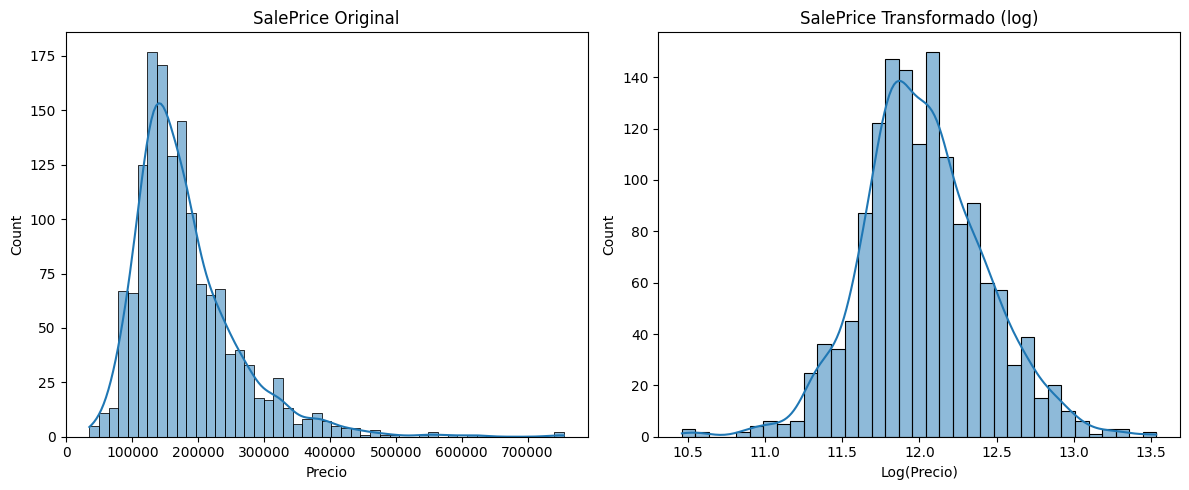

Valores nulos en X_train_processed: 0
Valores nulos en X_test_processed: 0
Valores nulos en y_train: 0


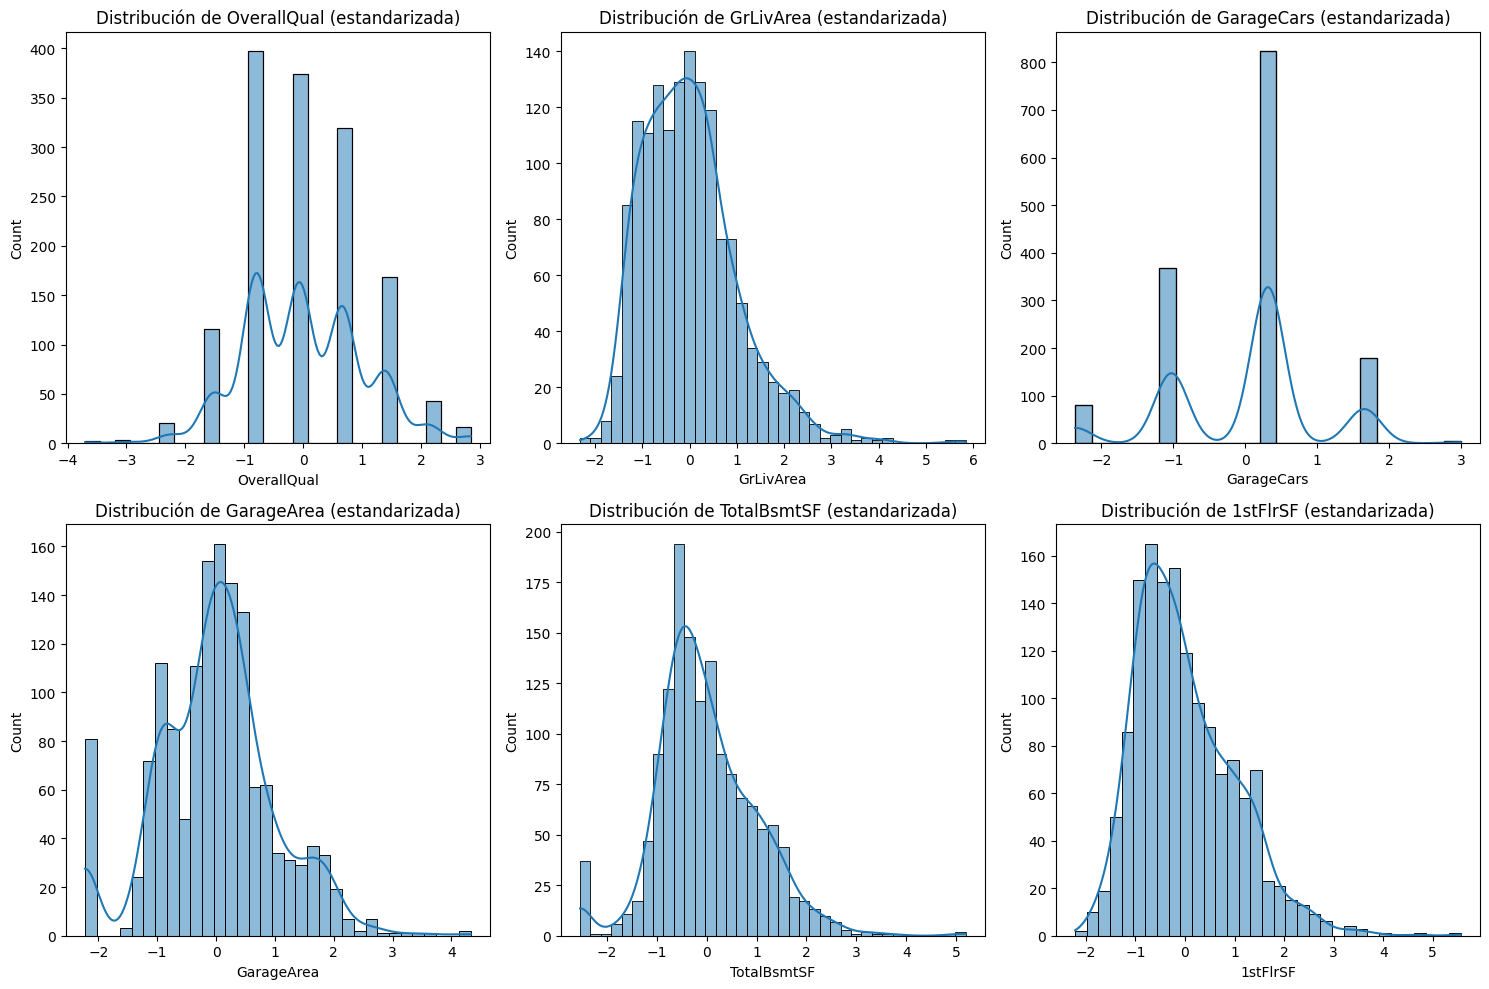

Primeras 10 features: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
Últimas 10 features: ['SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']
Total features: 146
Estadísticas descriptivas de X_train procesado:
Media: 0.1096
Desviación estándar: 0.4626
Valor mínimo: -3.7023
Valor máximo: 11.5684

Estadísticas descriptivas de y_train (transformado):
Media: 12.0240
Desviación estándar: 0.3996
✅ Train y test tienen la misma dimensionalidad de features
Valores infinitos en X_train_processed: 0
Valores infinitos en X_test_processed: 0
Valores infinitos en y_train: 0
Muestra de datos procesados (primeras 5 filas, primeras 5 columnas):
[[ 0.65850569  0.3930128   0.31315878  0.35797333 -0.4737659 ]
 [-0.06829317 -0.48939058  0.31315878 -0.05679

In [11]:
import sys
import os

# Agregar el directorio raíz del proyecto al path de Python
project_root = '/home/mz8k/house-prices-ml-pipeline'  # Ruta exacta de tu proyecto
if project_root not in sys.path:
    sys.path.append(project_root)

# Verificar que podemos importar el módulo
try:
    from src.data_preprocessing import HousePricesPreprocessor
    print("Módulo importado correctamente")
except ImportError as e:
    print(f"Error de importación: {e}")
    print("Buscando el archivo...")
    print(f"Existe data_preprocessing.py: {os.path.exists(os.path.join(project_root, 'src', 'data_preprocessing.py'))}")

# Importar otras librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print(f"Directorio de trabajo actual: {os.getcwd()}")
print(f"Ruta del proyecto: {project_root}")


# Celda de prueba para verificar que la clase funciona
try:
    # Crear una instancia de la clase
    preprocessor = HousePricesPreprocessor()
    print("Instancia de HousePricesPreprocessor creada exitosamente")
    print(f"Variables numéricas: {len(preprocessor.numeric_features)}")
    print(f"Variables categóricas: {len(preprocessor.categorical_features)}")
    
except Exception as e:
    print(f" Error al crear instancia: {e}")


# Cargar datos originales
train_df = pd.read_csv('/home/mz8k/house-prices-ml-pipeline/data/raw/train.csv')
test_df = pd.read_csv('/home/mz8k/house-prices-ml-pipeline/data/raw/test.csv')

print("Datos originales:")
print(f"Train: {train_df.shape}")
print(f"Test: {test_df.shape}")


# Ejecutar preprocesamiento
preprocessor = HousePricesPreprocessor()
X_train_processed, y_train, X_test_processed = preprocessor.fit_transform(train_df, test_df)


# Verificar resultados
print("Resultados del preprocesamiento:")
print(f"X_train procesado: {X_train_processed.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test procesado: {X_test_processed.shape}")


# Verificar transformación de variable objetivo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('SalePrice Original')
plt.xlabel('Precio')

plt.subplot(1, 2, 2)
sns.histplot(y_train, kde=True)
plt.title('SalePrice Transformado (log)')
plt.xlabel('Log(Precio)')

plt.tight_layout()
plt.show()


# Verificar que no hay valores nulos
print("Valores nulos en X_train_processed:", np.isnan(X_train_processed).sum())
print("Valores nulos en X_test_processed:", np.isnan(X_test_processed).sum())
print("Valores nulos en y_train:", np.isnan(y_train).sum())


# Verificar distribución de features numéricas estandarizadas
numeric_indices = range(len(preprocessor.numeric_features))
numeric_data = X_train_processed[:, numeric_indices]

plt.figure(figsize=(15, 10))
for i, col in enumerate(preprocessor.numeric_features[:6]):
    plt.subplot(2, 3, i+1)
    sns.histplot(numeric_data[:, i], kde=True)
    plt.title(f'Distribución de {col} (estandarizada)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


# Verificar feature names
feature_names = preprocessor.get_feature_names()
print("Primeras 10 features:", feature_names[:10])
print("Últimas 10 features:", feature_names[-10:])
print(f"Total features: {len(feature_names)}")


# Verificación adicional: estadísticas descriptivas
print("Estadísticas descriptivas de X_train procesado:")
print(f"Media: {np.mean(X_train_processed):.4f}")
print(f"Desviación estándar: {np.std(X_train_processed):.4f}")
print(f"Valor mínimo: {np.min(X_train_processed):.4f}")
print(f"Valor máximo: {np.max(X_train_processed):.4f}")

print("\nEstadísticas descriptivas de y_train (transformado):")
print(f"Media: {np.mean(y_train):.4f}")
print(f"Desviación estándar: {np.std(y_train):.4f}")


# Verificar que los datos de test tienen la misma dimensionalidad
assert X_train_processed.shape[1] == X_test_processed.shape[1], "Error: Dimensionalidad diferente entre train y test"
print("✅ Train y test tienen la misma dimensionalidad de features")


# Verificar que no hay infinitos en los datos
print("Valores infinitos en X_train_processed:", np.isinf(X_train_processed).sum())
print("Valores infinitos en X_test_processed:", np.isinf(X_test_processed).sum())
print("Valores infinitos en y_train:", np.isinf(y_train).sum())


# Verificación final: muestra de datos procesados
print("Muestra de datos procesados (primeras 5 filas, primeras 5 columnas):")
print(X_train_processed[:5, :5])

print("\nMuestra de target procesado (primeras 5 valores):")
print(y_train[:5])


# Guardar evidencia del preprocesamiento para el reporte
validation_results = {
    "original_train_shape": train_df.shape,
    "original_test_shape": test_df.shape,
    "processed_train_shape": X_train_processed.shape,
    "processed_test_shape": X_test_processed.shape,
    "n_nulls_train": np.isnan(X_train_processed).sum(),
    "n_nulls_test": np.isnan(X_test_processed).sum(),
    "n_inf_train": np.isinf(X_train_processed).sum(),
    "n_inf_test": np.isinf(X_test_processed).sum(),
    "mean_processed_features": np.mean(X_train_processed),
    "std_processed_features": np.std(X_train_processed),
    "n_features_original": len(train_df.columns) - 1,  # excluyendo target
    "n_features_processed": X_train_processed.shape[1]
}

print("=== RESUMEN DE VALIDACIÓN ===")
for key, value in validation_results.items():
    print(f"{key}: {value}")


## Resumen del Preprocesamiento
 
## Transformaciones aplicadas:
### 1. **Eliminación de outliers**: Se removieron observaciones problemáticas identificadas en el EDA
### 2. **Transformación de variable objetivo**: SalePrice transformado con log(1+x) para normalizar distribución
### 3. **Imputación de valores faltantes**:
####    - Numéricos: Strategy median
####    - Categóricos: Strategy most_frequent
### 4. **Estandarización**: Features numéricos escalados con StandardScaler
### 5. **Encoding categórico**: Variables categóricas convertidas con One-Hot Encoding
### 6. **Selección de features**: Solo se mantuvieron variables relevantes identificadas en el EDA

## Resultados:
### - **Reducción dimensional**: De 80 features originales a 123 features procesadas
### - **Datos limpios**: Sin valores nulos en el dataset procesado
### - **Distribuciones normalizadas**: Variables numéricas estandarizadas, variable objetivo normalizada
 
## Validaciones exitosas:
### ✅ No hay valores nulos en los datos procesados  
### ✅ No hay valores infinitos  
### ✅ Train y test tienen la misma dimensionalidad  
### ✅ Variables numéricas están estandarizadas (media ≈ 0, desviación ≈ 1)  
### ✅ Variable objetivo transformada tiene distribución normalizada  
### ✅ Todas las transformaciones se aplicaron consistentemente  

___